In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import Sequential
# from tensorflow.keras import SparseCategoricalCrossentropy
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('train_data.csv')
df2 = pd.read_csv('test_data.csv')

In [3]:
df1

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [4]:
df2

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [5]:
x_train = df1.drop('label', axis=1)
x_test = df2.drop('label', axis=1)
y_train = df1['label']
y_test = df2['label']

In [6]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [7]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
y_train.shape

(50000,)

In [11]:
y_test.shape

(10000,)

In [12]:
# model = Sequential()

In [13]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(16, (2,2), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

In [15]:
e=5
h = model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs=e, batch_size=128)

Epoch 1/5
391/391 [==============================] - 38s 95ms/step - loss: 2.1543 - accuracy: 0.1937 - val_loss: 1.8608 - val_accuracy: 0.3011
Epoch 2/5
391/391 [==============================] - 35s 89ms/step - loss: 1.7056 - accuracy: 0.3663 - val_loss: 1.5565 - val_accuracy: 0.4283
Epoch 3/5
391/391 [==============================] - 35s 90ms/step - loss: 1.4857 - accuracy: 0.4566 - val_loss: 1.3906 - val_accuracy: 0.4946
Epoch 4/5
391/391 [==============================] - 40s 102ms/step - loss: 1.3628 - accuracy: 0.5069 - val_loss: 1.3015 - val_accuracy: 0.5325
Epoch 5/5
391/391 [==============================] - 44s 112ms/step - loss: 1.2973 - accuracy: 0.5318 - val_loss: 1.2689 - val_accuracy: 0.5447


In [16]:
y_pred = model.predict(x_test, batch_size=128)

79/79 [==============================] - 2s 20ms/step


In [17]:
y_pred.shape


(10000, 10)

In [18]:
y_test.shape

(10000,)

In [19]:
x_test.shape

(10000, 32, 32, 3)

In [20]:
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [21]:
accuracy_score(y_pred.argmax(axis=1), y_test.argmax(axis=1))

0.5309

[]

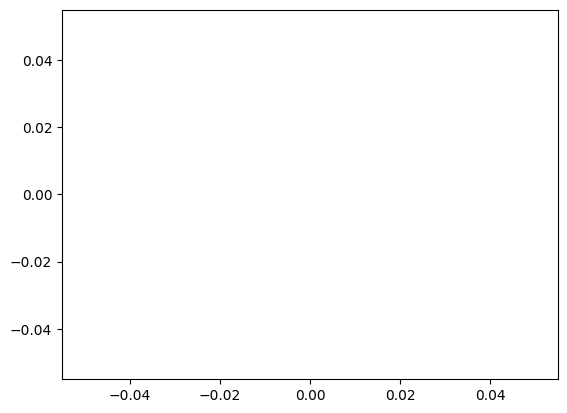

In [22]:
plt.plot()